In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [161]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://homl.info/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic:
            titanic.extractall(path="datasets")
    return pd.read_csv(Path("datasets/titanic/train.csv")), pd.read_csv(Path("datasets/titanic/test.csv"))

train, test = load_housing_data()

In [162]:
columns_des = pd.DataFrame(
    [["survival","Survival","0 = No, 1 = Yes"],
    ["pclass","Ticket class","1 = 1st, 2 = 2nd, 3 = 3rd"],
    ["sex","Sex",""],
    ["Age","Age in years",""],
    ["sibsp","# of siblings / spouses aboard the Titanic",""],
    ["parch","# of parents / children aboard the Titanic",""],
    ["ticket","Ticket number",""],
    ["fare","Passenger fare",""],
    ["cabin","Cabin number",""],
    ["embarked","Port of Embarkation","C = Cherbourg, Q = Queenstown, S = Southampton"]],
    columns=['Variable', "Definition", "Key"]
)
columns_des

,Variable,Definition,Key
0,survival,Survival,"0 = No, 1 = Yes"
1,pclass,Ticket class,"1 = 1st, 2 = 2nd, 3 = 3rd"
2,sex,Sex,
3,Age,Age in years,
4,sibsp,# of siblings / spouses aboard the Titanic,
5,parch,# of parents / children aboard the Titanic,
6,ticket,Ticket number,
7,fare,Passenger fare,
8,cabin,Cabin number,
9,embarked,Port of Embarkation,"C = Cherbourg, Q = Queenstown, S = Southampton"


In [163]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [164]:
# X_train = train.drop('Survived', axis=1)
# y_train = train['Survived']
X_train = train.copy()
# X_train.set_index('PassengerId', inplace=True)
# test.set_index('PassengerId', inplace=True)

In [165]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [166]:
X_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### findings
1. there are 177 rows with missing ages: fill mean
2. there are 687 rows with missing Cabin: drop the column
3. there are 2 rows with missing Embarked: drop these two rows

In [167]:
# fill average ages for nan value
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].mean())
X_train.drop('Cabin', axis=1, inplace=True)
X_train.dropna(subset='Embarked', axis=0, inplace=True)
X_train['Name_transformed'] = X_train['Name'].apply(
    lambda x: x.split('.')[0].split(',')[-1].strip()
)

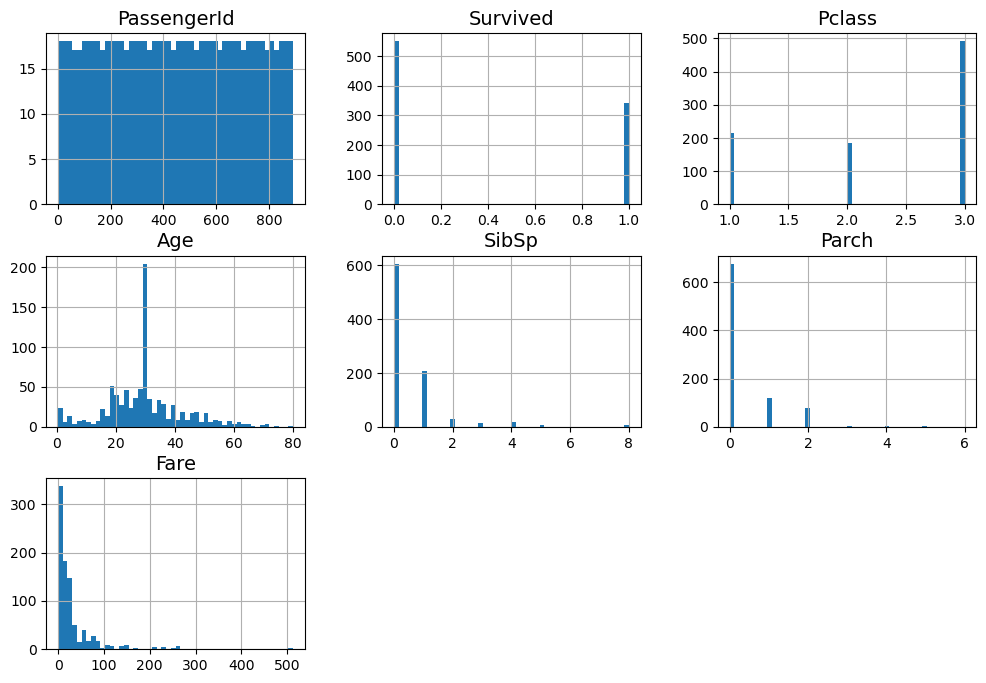

In [168]:
# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

X_train.hist(bins=50, figsize=(12, 8))
plt.show()

In [184]:
X_train['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

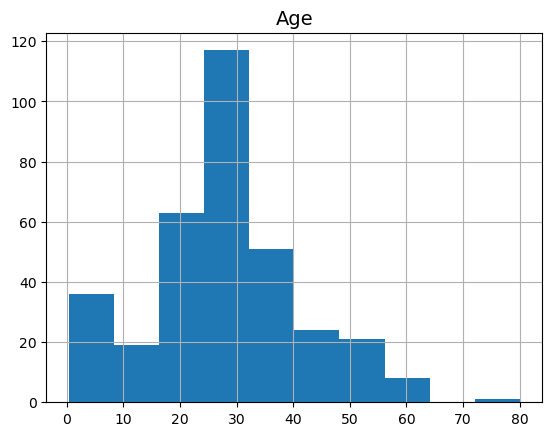

In [181]:
X_train[X_train['Survived']==1][['Age']].hist()

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

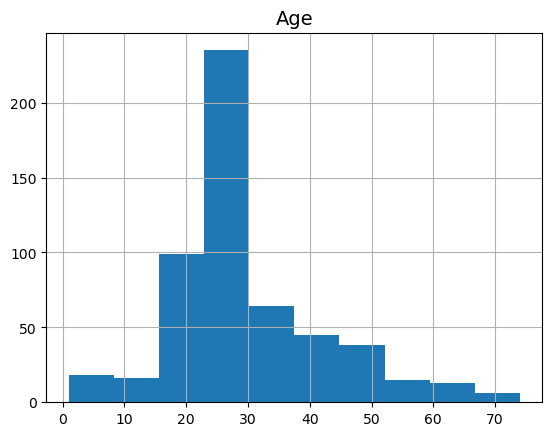

In [182]:
X_train[X_train['Survived']==0][['Age']].hist()

In [105]:
X_train.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

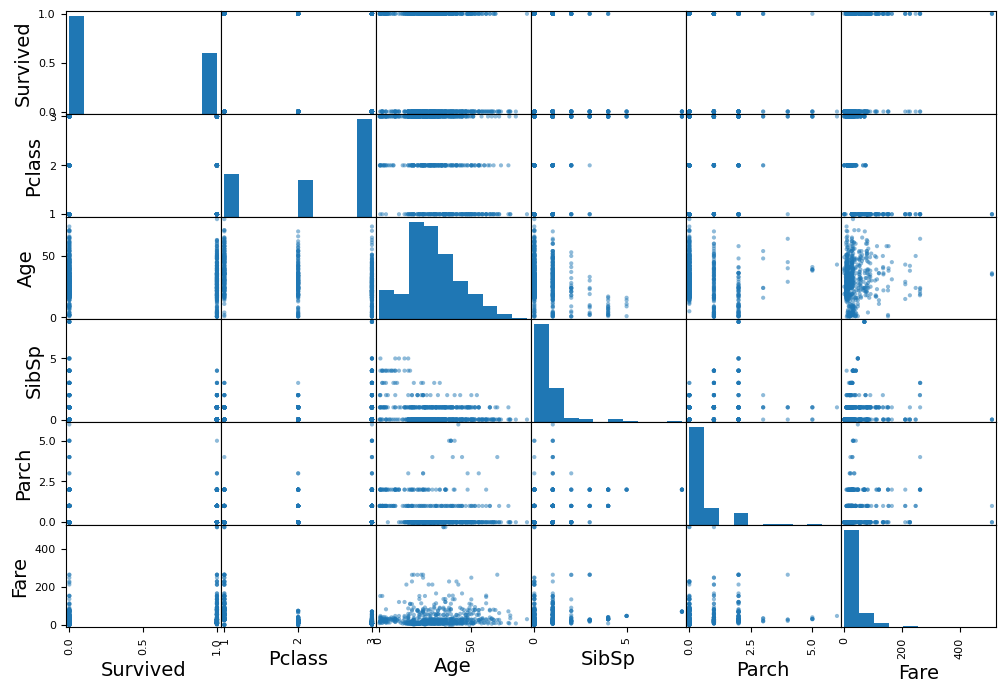

In [89]:
from pandas.plotting import scatter_matrix

scatter_matrix(X_train.select_dtypes(include=[np.number]), figsize=(12, 8))
plt.show()

In [185]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_transformed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


<AxesSubplot:xlabel='SibSp', ylabel='Parch'>

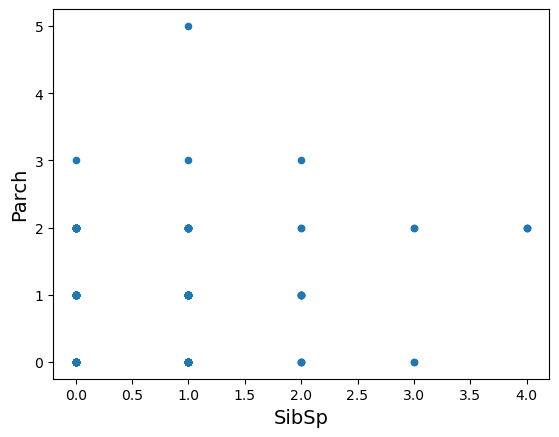

In [197]:
X_train[X_train['Survived']==1].plot.scatter(x='SibSp', y='Parch')

<AxesSubplot:xlabel='SibSp', ylabel='Parch'>

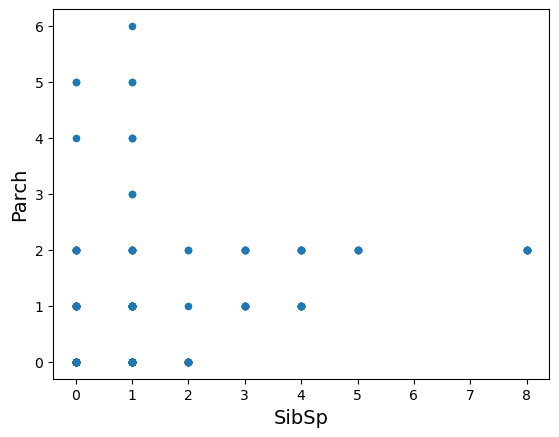

In [196]:
X_train[X_train['Survived']==0].plot.scatter(x='SibSp', y='Parch')

In [195]:
X_train[X_train['Survived']==0].shape

(549, 12)

<AxesSubplot:>

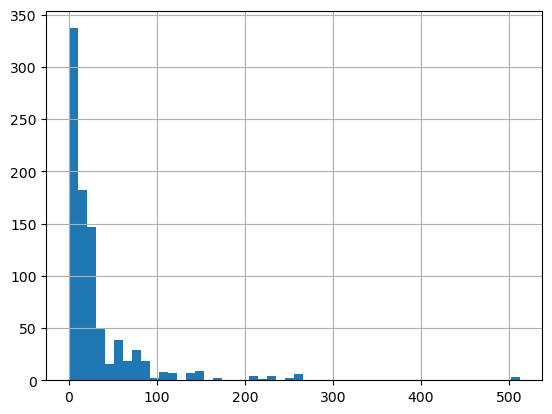

In [13]:
X_train['Fare'].hist(bins=50)

In [100]:
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log, inverse_func=np.exp)
log_pop = log_transformer.transform(X_train.loc[X_train['Fare']!=0, 'Fare'])

array([[<AxesSubplot:title={'center':'Fare'}>]], dtype=object)

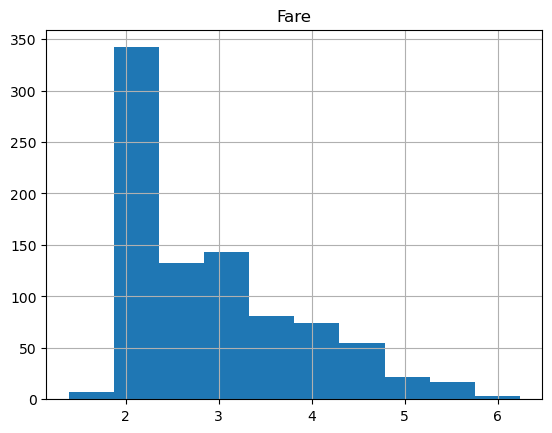

In [102]:
pd.DataFrame(log_pop).hist()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

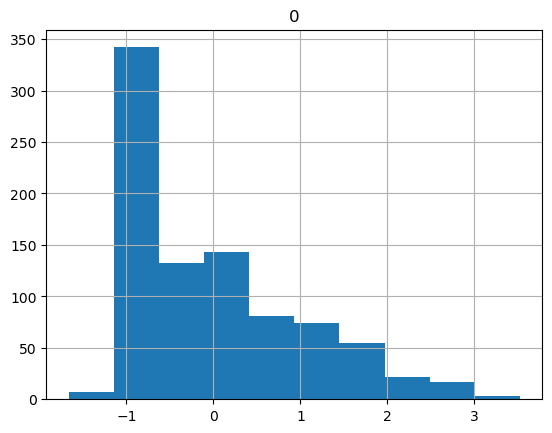

In [104]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_fare = std_scaler.fit_transform(log_pop.to_frame())
pd.DataFrame(std_fare).hist(bins=10)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

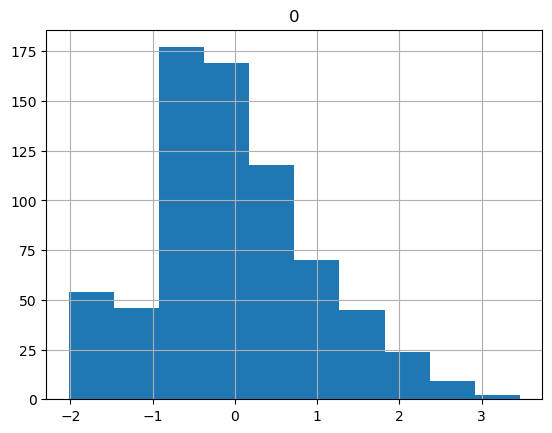

In [98]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_fare = std_scaler.fit_transform(X_train['Age'].to_frame())
pd.DataFrame(std_fare).hist(bins=10)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

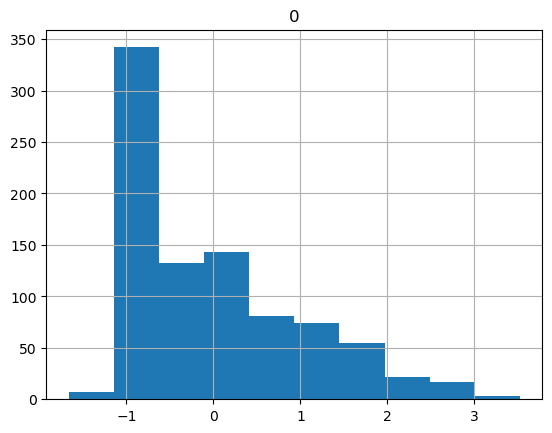

In [72]:
pd.DataFrame(std_fare).hist(bins=10)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

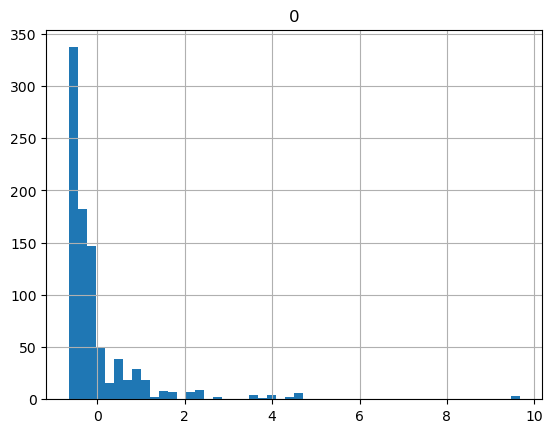

In [43]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_fare = std_scaler.fit_transform(np.array(np.array(X_train.loc[:, 'Fare']).reshape(-1,1)))
pd.DataFrame(std_fare).hist(bins=50)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

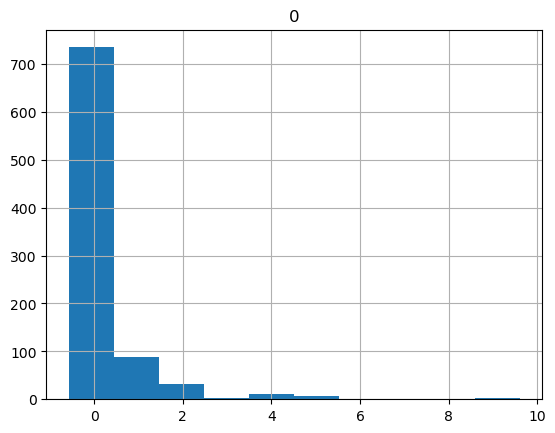

In [35]:
pd.DataFrame(std_fare).hist()

In [31]:
np.array(X_train.loc[X_train['Fare']!=0, 'Fare']).reshape(-1,1)

array([[  7.25  ],
       [ 71.2833],
       [  7.925 ],
       [ 53.1   ],
       [  8.05  ],
       [  8.4583],
       [ 51.8625],
       [ 21.075 ],
       [ 11.1333],
       [ 30.0708],
       [ 16.7   ],
       [ 26.55  ],
       [  8.05  ],
       [ 31.275 ],
       [  7.8542],
       [ 16.    ],
       [ 29.125 ],
       [ 13.    ],
       [ 18.    ],
       [  7.225 ],
       [ 26.    ],
       [ 13.    ],
       [  8.0292],
       [ 35.5   ],
       [ 21.075 ],
       [ 31.3875],
       [  7.225 ],
       [263.    ],
       [  7.8792],
       [  7.8958],
       [ 27.7208],
       [146.5208],
       [  7.75  ],
       [ 10.5   ],
       [ 82.1708],
       [ 52.    ],
       [  7.2292],
       [  8.05  ],
       [ 18.    ],
       [ 11.2417],
       [  9.475 ],
       [ 21.    ],
       [  7.8958],
       [ 41.5792],
       [  7.8792],
       [  8.05  ],
       [ 15.5   ],
       [  7.75  ],
       [ 21.6792],
       [ 17.8   ],
       [ 39.6875],
       [  7.8   ],
       [ 76.

In [113]:
X_train.select_dtypes(include='object').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      891 non-null    object
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: object(5)
memory usage: 41.8+ KB


In [151]:
from sklearn.preprocessing import OneHotEncoder

col_encoder = ['Sex', 'Embarked']
ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
ohe_data = ohe.fit_transform(X_train[col_encoder])

In [135]:
ohe_data

array([[0., 1., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0., 1., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0.]])

In [141]:
ohe.get_feature_names_out()

array(['Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Embarked_nan'], dtype=object)

In [154]:
df_encoder = pd.DataFrame(ohe_data, columns=ohe.get_feature_names_out(),
                          index=X_train.index)

In [155]:
df_encoder

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
886,0.0,1.0,0.0,0.0,1.0,0.0
887,1.0,0.0,0.0,0.0,1.0,0.0
888,1.0,0.0,0.0,0.0,1.0,0.0
889,0.0,1.0,1.0,0.0,0.0,0.0


In [157]:
X_train = X_train.join(df_encoder)
X_train.drop(col_encoder, axis=1, inplace=True)

In [158]:
X_train.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_nan
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1.0,0.0,1.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1.0,0.0,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1.0,0.0,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0.0,1.0,0.0,0.0,1.0,0.0


In [132]:
ohe.categories_

[array(['female', 'male'], dtype=object),
 array(['C', 'Q', 'S', nan], dtype=object)]

In [170]:
X_train[X_train['Survived']==1]['Name_transformed'].value_counts()

Miss            126
Mrs              98
Mr               81
Master           23
Dr                3
Mlle              2
Mme               1
Ms                1
Major             1
Lady              1
Sir               1
Col               1
the Countess      1
Name: Name_transformed, dtype: int64

In [171]:
X_train[X_train['Survived']==0]['Name_transformed'].value_counts()

Mr          436
Miss         55
Mrs          26
Master       17
Rev           6
Dr            4
Don           1
Major         1
Col           1
Capt          1
Jonkheer      1
Name: Name_transformed, dtype: int64